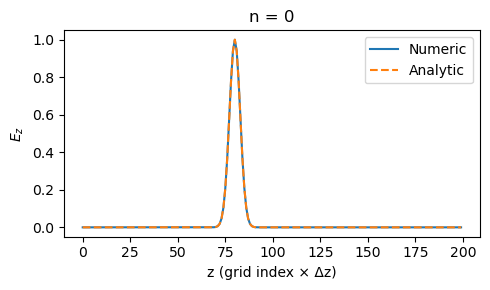

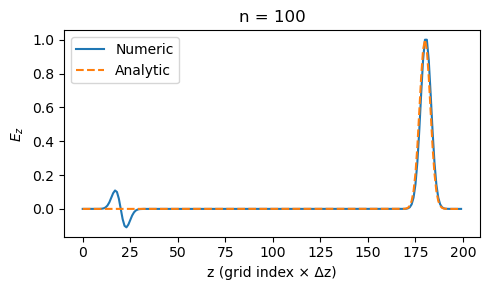

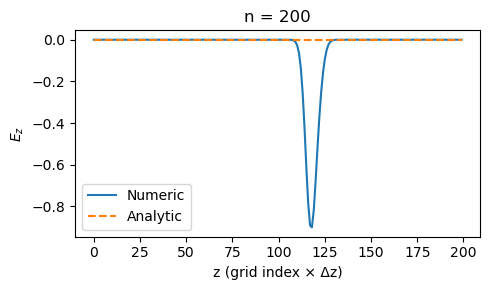

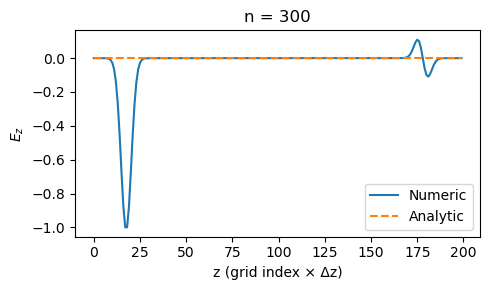

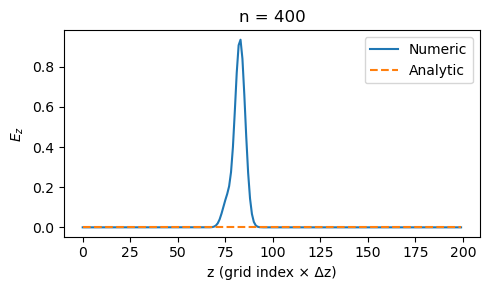

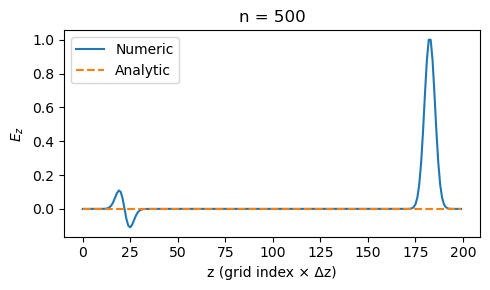

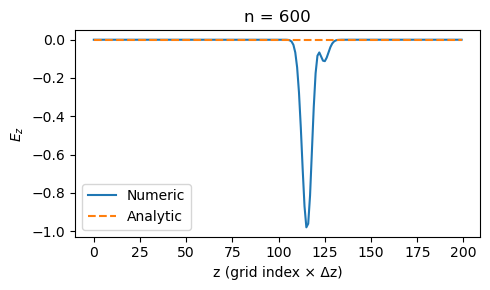

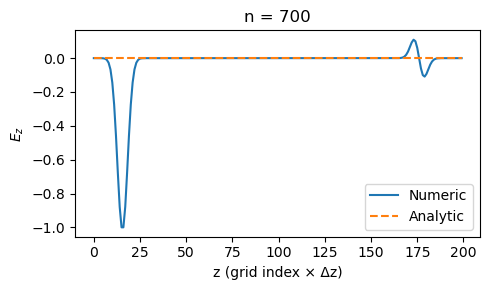

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ─── 물리 상수 ─────────────────────────────────────────
c0   = 2.99792458e8        # 빛 속도 (m/s)
mu0  = 4*np.pi*1e-7        # 진공 투자율 (H/m)
eps0 = 1/(mu0*c0**2)       # 진공 유전율 (F/m)
eta0 = np.sqrt(mu0/eps0)   # 임피던스

# ─── 그리드 및 시간 설정 ───────────────────────────────
i_c    = 80                # 초기 펄스 중심 인덱스
i_w    = 4                 # 폭 인덱스
Nx     = 200               # 총 격자 수 (i=0…Nx-1)
dz     = 1.0               # Δz (임의 단위)
Sc     = 1.0               # Courant 수 (≤1)
dt     = Sc * dz / c0      # Δt
C_F    = c0 * dt / dz      # =Sc
nsteps = 700               # 전체 타임스텝

# ─── 필드 배열 초기화 ──────────────────────────────────
i = np.arange(Nx)
# 전기장 초기조건: Gaussian, exponent 2승
Ez = np.exp(-((i - i_c) / i_w)**2)

# 자기장 초기조건: 1/η0, exponent 2승, i+½ 에서 CF/2 만큼 shift
ip = np.arange(Nx-1) + 0.5
Hy = (1/eta0) * np.exp(-((ip - i_c - C_F/2) / i_w)**2)

# PEC 경계 적용 (n=0 snapshot 저장)
Ez[0] = Ez[-1] = 0.0

# ─── 스냅샷 타임스텝 설정 ───────────────────────────────
snapshot_steps = list(range(0, nsteps+1, 100))  # [0,100,200,…,700]
snapshots = {0: Ez.copy()}

# ─── FDTD 시간 루프 ────────────────────────────────────
for n in range(1, nsteps+1):
    # (1) H 필드 update (n+½)
    Hy -= (dt/(mu0*dz)) * (Ez[1:] - Ez[:-1])
    # (2) E 필드 update (n+1)
    Ez[1:-1] -= (dt/(eps0*dz)) * (Hy[1:] - Hy[:-1])
    # (3) PEC 경계조건
    Ez[0] = Ez[-1] = 0.0
    # (4) 스냅샷 저장
    if n in snapshot_steps:
        snapshots[n] = Ez.copy()

# ─── analytic 해 준비 ───────────────────────────────────
z   = i * dz
z_c = i_c * dz
w   = i_w * dz

# ─── 결과 플롯 (8개 개별 Figure) ───────────────────────
for n in snapshot_steps:
    Ez_num = snapshots[n]
    Ez_ana = np.exp(-((z - z_c - c0*n*dt)/w)**2)

    plt.figure(figsize=(5,3))
    plt.plot(z,      Ez_num, label='Numeric')
    plt.plot(z, Ez_ana, '--', label='Analytic')
    plt.xlabel('z (grid index × Δz)')
    plt.ylabel('$E_z$')
    plt.title(f'n = {n}')
    plt.legend()
    plt.tight_layout()
    plt.show()


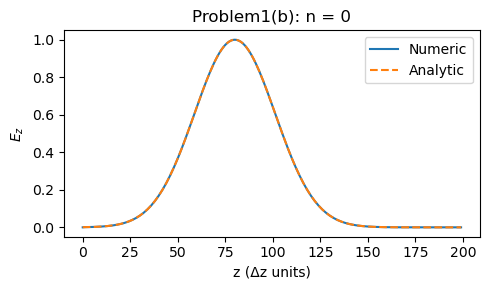

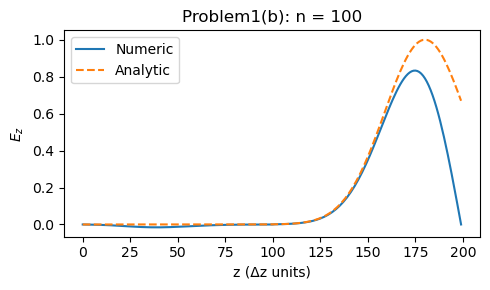

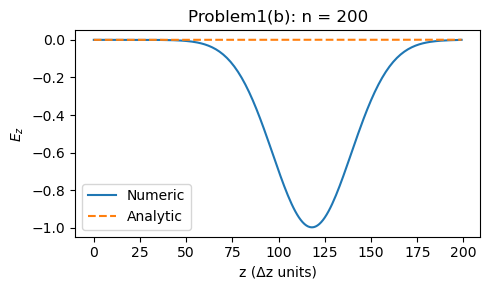

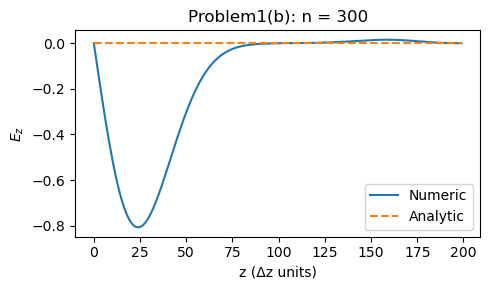

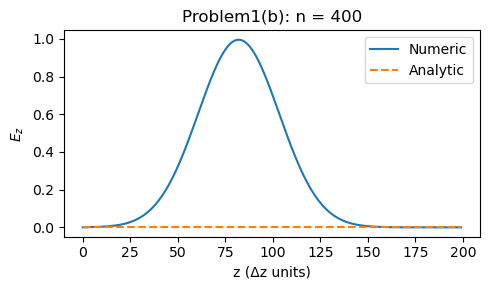

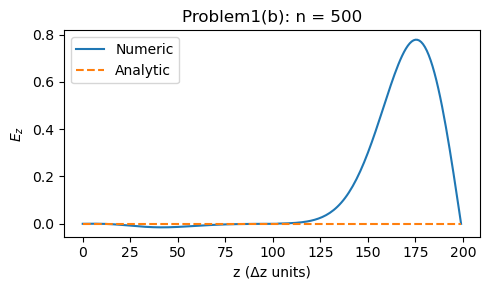

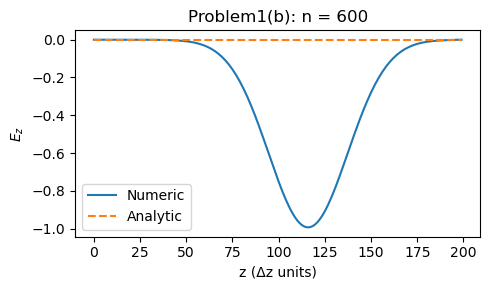

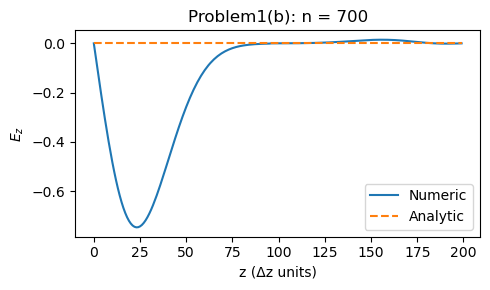

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ─── 물리 상수 ─────────────────────────────────────────
c0   = 2.99792458e8        # 빛 속도 (m/s)
mu0  = 4*np.pi*1e-7        # 진공 투자율 (H/m)
eps0 = 1/(mu0*c0**2)       # 진공 유전율 (F/m)
eta0 = np.sqrt(mu0/eps0)   # 임피던스

# ─── 그리드 및 시간 설정 ───────────────────────────────
i_c    = 80                # 문제 (b) 에서 바뀐 펄스 중심 인덱스
i_w    = 30                # 문제 (b) 에서 바뀐 폭 인덱스
Nx     = 200               # 격자 수 (0…Nx-1)
dz     = 1.0               # Δz (임의 단위)
Sc     = 1.0               # Courant 수
dt     = Sc * dz / c0      # Δt
C_F    = c0 * dt / dz      # =Sc
nsteps = 700               # 전체 타임스텝

# ─── 필드 배열 초기화 ──────────────────────────────────
i  = np.arange(Nx)
Ez = np.exp(-((i - i_c) / i_w)**2)           # E 초기조건 (Gaussian, exponent=2)
ip = np.arange(Nx-1) + 0.5
Hy = (1/eta0) * np.exp(-((ip - i_c - C_F/2) / i_w)**2)  # H 초기조건

# PEC 경계 조건 (t=0 snapshot)
Ez[0] = Ez[-1] = 0.0

# ─── 스냅샷 타임스텝 지정 ───────────────────────────────
snapshot_steps = list(range(0, nsteps+1, 100))  # [0,100,200,…,700]
snapshots = {0: Ez.copy()}

# ─── FDTD 루프 ──────────────────────────────────────────
for n in range(1, nsteps+1):
    # H 업데이트
    Hy -= (dt/(mu0*dz)) * (Ez[1:] - Ez[:-1])
    # E 업데이트
    Ez[1:-1] -= (dt/(eps0*dz)) * (Hy[1:] - Hy[:-1])
    # PEC 경계
    Ez[0] = Ez[-1] = 0.0
    # 스냅샷 저장
    if n in snapshot_steps:
        snapshots[n] = Ez.copy()

# ─── analytic 해 준비 ───────────────────────────────────
z   = i * dz
z_c = i_c * dz
w   = i_w * dz

# ─── 결과 플롯 (8개 개별 Figure) ───────────────────────
for n in snapshot_steps:
    Ez_num = snapshots[n]
    Ez_ana = np.exp(-((z - z_c - c0*n*dt)/w)**2)

    plt.figure(figsize=(5,3))
    plt.plot(z,      Ez_num, label='Numeric')
    plt.plot(z, Ez_ana, '--',   label='Analytic')
    plt.xlabel('z (Δz units)')
    plt.ylabel('$E_z$')
    plt.title(f'Problem1(b): n = {n}')
    plt.legend()
    plt.tight_layout()
    plt.show()


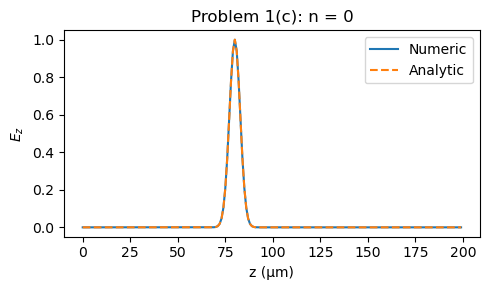

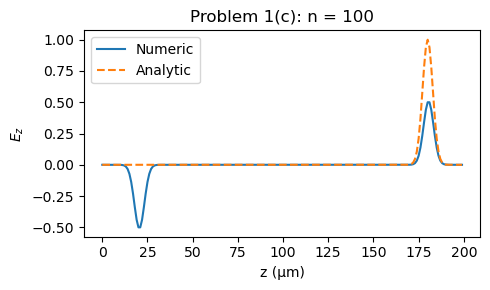

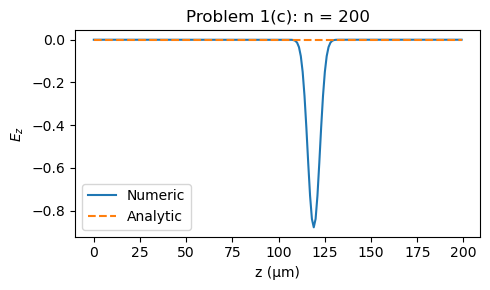

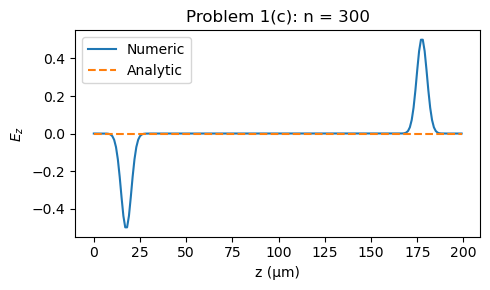

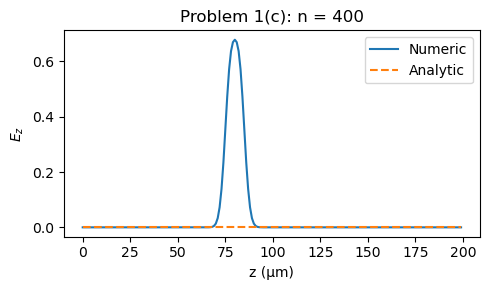

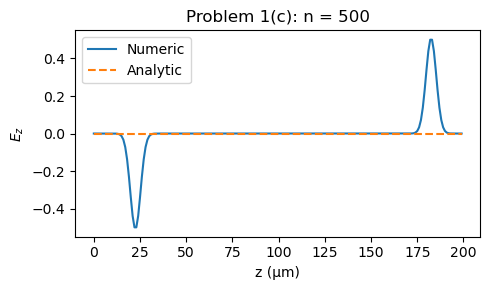

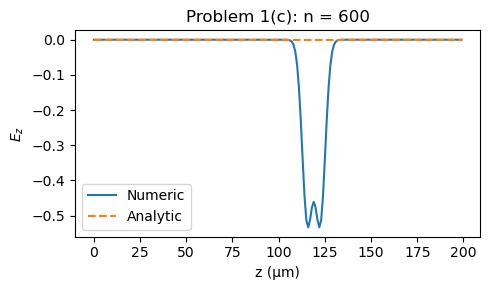

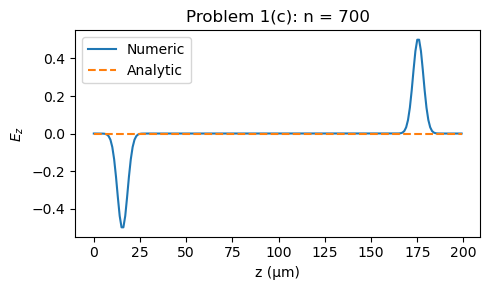

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ─── 물리 상수 ─────────────────────────────────────────
c0   = 2.99792458e8      # 빛 속도 (m/s)
mu0  = 4*np.pi*1e-7      # 진공 투자율 (H/m)
eps0 = 1/(mu0*c0**2)     # 진공 유전율 (F/m)
eta0 = np.sqrt(mu0/eps0) # 임피던스

# ─── 그리드 및 시간 설정 ───────────────────────────────
i_c    = 80              # 펄스 중심 인덱스
i_w    = 4               # 펄스 폭 인덱스
Nx     = 200             # 격자 수 (0…Nx-1)
dz     = 1.0             # Δz (임의 단위)
Sc     = 1.0             # Courant 수
dt     = Sc * dz / c0    # Δt
nsteps = 700             # 전체 타임스텝

# ─── 초기조건 ──────────────────────────────────────────
i  = np.arange(Nx)
# (1) Eᵢ⁰ = exp[-((i - i_c)/i_w)^2]
Ez = np.exp(-((i - i_c) / i_w)**2)

# (2) Hⁱ⁺¹/₂ᵢ⁺¹/₂ = 0  ← 문제(c)의 변경점
Hy = np.zeros(Nx-1)

# PEC 경계조건 (t=0)
Ez[0] = Ez[-1] = 0.0

# ─── 스냅샷 타임스텝 지정 ───────────────────────────────
snapshot_steps = list(range(0, nsteps+1, 100))  # [0,100,200,…,700]
snapshots = {0: Ez.copy()}

# ─── FDTD 시간 루프 ────────────────────────────────────
for n in range(1, nsteps+1):
    # H 업데이트 (n+1/2)
    Hy -= (dt/(mu0*dz)) * (Ez[1:] - Ez[:-1])
    # E 업데이트 (n+1)
    Ez[1:-1] -= (dt/(eps0*dz)) * (Hy[1:] - Hy[:-1])
    # PEC 경계
    Ez[0] = Ez[-1] = 0.0
    # 스냅샷 저장
    if n in snapshot_steps:
        snapshots[n] = Ez.copy()

# ─── analytic 해 계산 ───────────────────────────────────
z   = i * dz
z_c = i_c * dz
w   = i_w * dz

# ─── 결과 플롯 (8개 개별 Figure) ───────────────────────
for n in snapshot_steps:
    Ez_num = snapshots[n]
    Ez_ana = np.exp(-((z - z_c - c0*n*dt)/w)**2)

    plt.figure(figsize=(5,3))
    plt.plot(z,      Ez_num, label='Numeric')
    plt.plot(z, Ez_ana, '--',   label='Analytic')
    plt.xlabel('z (µm)')
    plt.ylabel('$E_z$')
    plt.title(f'Problem 1(c): n = {n}')
    plt.legend()
    plt.tight_layout()
    plt.show()
